# Virtual Burrow Assay (VBA) and Freely-Moving Nose Poke Paradigm
## Behavioral Analysis
#### April 2021
__Notebook Description:__ Analyses of processed data of the VBA and Freely-Moving Nose Poke behavioral tasks <br>
__Data Owner(s):__ Erica Rodriguez, C. Daniel Salzman <br>

***
## Configuration

System Configuration for original notebook execution above (Rahim Hashim, Apr 2021):

In [1]:
import platform

print ('system   :', platform.system()) # Darwin = Macbook
print ('node     :', platform.node())
print ('release  :', platform.release())
print ('version  :', platform.version())
print ('machine  :', platform.machine())
print ('processor:', platform.processor())

system   : Linux
node     : 8b1c4c80092b
release  : 5.4.109+
version  : #1 SMP Tue Apr 20 19:55:43 PDT 2021
machine  : x86_64
processor: x86_64


***
## Libraries, Mounting Google Drive, and Path Assignment
To start, we will import all the necessary libraries, and mount our google drive in order to access helper functions and the data folders.

In [2]:
import os 
import sys
import re
import csv
import ast
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from collections import defaultdict
from ipywidgets import interact, interact_manual
from matplotlib.collections import PatchCollection
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#@title ## Path Selection { run: "auto" }
#@markdown Assign the root for your directory. If you want to see if the assigned directory contains the correct files, check the variable *print_dir* box
from pprint import pprint

root = 'drive/MyDrive/Columbia/Salzman/Projects/Social-Behavior/' #@param ['drive/MyDrive/Columbia/Salzman/Projects/Social-Behavior/', 'drive/MyDrive/Social Behavior/']
raw_data = 'VBA' #@param ['VBA']
task = 'VBA_Processed' #@param ['VBA_RawDataandCode', 'NosePoke_RawDataandCode', 'VBA_Processed']
if task == 'VBA_Processed':
  figure_data_path = 'VBA_Figures/'
else:
  figure_data_path = 'NosePoke_Figures/'

raw_path = root+raw_data
current_path = root+task+'/'
current_dir = os.listdir(current_path)
figure_data_path = root+figure_data_path
print('Current directory: {}'.format(current_path))
print_dir = True #@param {type:"boolean"}
if print_dir:
  for data_file in sorted(current_dir):
    print('  ', data_file)
print('Target directory: {}\n'.format(figure_data_path))

if not os.path.exists(figure_data_path):
    os.makedirs(figure_data_path)

raw_data_files = []
mice_list = []
for path, subdirs, files in os.walk(raw_path):
    mice_list.append(subdirs)
    for name in files:
        raw_data_files.append(os.path.join(path, name))

print('Raw Files Count:', len(raw_data_files))
print('Processed Files Count:', len(current_dir))
print('  Mice:')
pprint(sorted(mice_list[0]), indent=4)

Current directory: drive/MyDrive/Columbia/Salzman/Projects/Social-Behavior/VBA_Processed/
   ACC22_12072020_blankA2.mat
   ACC22_12072020_blankB2.mat
   ACC22_12072020_female2.mat
   ACC22_12072020_water2.mat
   ACC23_12072020_blankA2.mat
   ACC23_12072020_blankB2.mat
   ACC23_12072020_female2.mat
   ACC23_12072020_water2.mat
   HP1_09222020_femaleurine.mat
   HP1_09222020_femaleurine2x.mat
   HP1_09222020_maleurine2x.mat
   HP1_09222020_minoil1.mat
   HP1_09232020_femaleurine20ul_day2.mat
   HP1_09232020_maleurine20ul_day2.mat
   HP1_09232020_water20ul_day2.mat
   HP2_09222020_femaleurine20ul.mat
   HP2_09222020_maleurine20ul.mat
   HP2_09222020_water20ul.mat
   HP2_09232020_femaleurine20ul_day2.mat
   HP2_09232020_maleurine20ul_day2.mat
   HP2_09232020_water20ul_day2.mat
   PO377_09222020_femaleurine20ul.mat
   PO377_09222020_maleurine20ul.mat
   PO377_09222020_water20ul.mat
   PO377_09232020_femaleurine20ul_day2_1.mat
   PO377_09232020_maleurine20ul_day2.mat
   PO377_09232020_water2

***
## Load Matlab Data

Both the VBA and Freely Moving Nose Poke tasks output .mat, so first we will convert the data into a python structure.

In [4]:
sys.path.append(root+'Analysis_Scripts/helper/') # set to path of notebook
import mat_import
from tqdm.notebook import tqdm

def mat2py_VBA(): 
  VBA_file_list = [f for f in current_dir if f[-4:] == '.mat' in f and 'pilot' not in f]
  sessions_df = pd.DataFrame()
  print('Converting .mat to pandas dataframe')
  for session in tqdm(sorted(VBA_file_list)):
    session_dict = defaultdict(lambda:defaultdict(list))

    print('Converting: {}'.format(session))
    f = mat_import.loadmat(current_path+session)
    file_name = session.split('_')
    session_dict['mouse'] = file_name[0]
    session_dict['date'] = file_name[1]
    session_dict['stimuli'] = file_name[2]
    session_dict['displacement'] = f['data']['Displacement']
    session_dict['force'] = f['data']['Force']
    sessions_df = sessions_df.append(session_dict, ignore_index=True)
    
  print('  Complete.')
  # reorder columns
  cols = ['mouse', 'date', 'stimuli', 'displacement', 'force']
  sessions_df = sessions_df[cols]
  return sessions_df

sessions_df = mat2py_VBA()

Converting .mat to pandas dataframe


Converting: ACC22_12072020_blankA2.mat
Converting: ACC22_12072020_blankB2.mat
Converting: ACC22_12072020_female2.mat
Converting: ACC22_12072020_water2.mat
Converting: ACC23_12072020_blankA2.mat
Converting: ACC23_12072020_blankB2.mat
Converting: ACC23_12072020_female2.mat
Converting: ACC23_12072020_water2.mat
Converting: HP1_09222020_femaleurine.mat
Converting: HP1_09222020_femaleurine2x.mat
Converting: HP1_09222020_maleurine2x.mat
Converting: HP1_09222020_minoil1.mat
Converting: HP1_09232020_femaleurine20ul_day2.mat
Converting: HP1_09232020_maleurine20ul_day2.mat
Converting: HP1_09232020_water20ul_day2.mat
Converting: HP2_09222020_femaleurine20ul.mat
Converting: HP2_09222020_maleurine20ul.mat
Converting: HP2_09222020_water20ul.mat
Converting: HP2_09232020_femaleurine20ul_day2.mat
Converting: HP2_09232020_maleurine20ul_day2.mat
Converting: HP2_09232020_water20ul_day2.mat
Converting: PO377_09222020_femaleurine20ul.mat
Converting: PO377_09222020_maleurine20ul.mat
Converting: PO377_0922202

In [5]:
verbose = False #@param {type:"boolean"}
if verbose:
  pd.set_option('display.max_rows', None)
else:
  pd.set_option('display.max_rows', 10)  
display(sessions_df)

,mouse,date,stimuli,displacement,force
0,ACC22,12072020,blankA2.mat,"[40.62579208111856, 40.62579208111856, 40.6257...","[0.20510181819554418, 0.20510181819554418, 0.2..."
1,ACC22,12072020,blankB2.mat,"[39.24058196134865, 39.24058196134865, 39.2727...","[0.2837044389452785, 0.2837044389452785, 0.282..."
2,ACC22,12072020,female2.mat,"[42.20428733387962, 42.20428733387962, 42.2365...","[0.009239550097845495, 0.009239550097845495, 0..."
3,ACC22,12072020,water2.mat,"[38.49965561821591, 38.49965561821591, 38.4996...","[0.009239550097845495, 0.009239550097845495, 0..."
4,ACC23,12072020,blankA2.mat,"[39.88486573798582, 39.88486573798582, 39.8848...","[0.38421270810067654, 0.3829241405474022, 0.38..."
5,ACC23,12072020,blankB2.mat,"[39.62715222733095, 39.62715222733095, 39.6271...","[0.4061183565063402, 0.4086954916128889, 0.407..."
6,ACC23,12072020,female2.mat,"[42.94521367701236, 42.9129994881805, 42.91299...","[0.009239550097845495, 0.009239550097845495, 0..."
7,ACC23,12072020,water2.mat,"[40.04593668214511, 40.07815087097697, 40.0459...","[0.21154465596191585, 0.21154465596191585, 0.2..."
8,HP1,09222020,femaleurine.mat,"[48.00284132361412, 48.00284132361412, 48.0028...","[0.8828883512178436, 0.8815997836645693, 0.882..."
9,HP1,09222020,femaleurine2x.mat,"[58.40802431630436, 58.40802431630436, 58.4080...","[0.010528117651119828, 0.010528117651119828, 0..."


habituation
  displacement: -5986.109976341855
  force: 630599.2766252931
habituation
  displacement: 6504.61829872282
  force: 851429.3282414079
habituation
  displacement: 2976.937049519495
  force: 457632.33471396577
blank
  displacement: 732.8728094359003
  force: 842157.6736957156
blank
  displacement: 743.0934247390657
  force: 248306.64261081317
blank
  displacement: 5582.330983929002
  force: 322640.7766345564
dominant.mat
  displacement: 58528.506752635985
  force: 1173851.472415199
habituation.mat
  displacement: 6788.828642746335
  force: 417582.7120655818
submissive.mat
  displacement: -5565.336413534018
  force: 1148402.7870453508
water.mat
  displacement: 12021.244484006973
  force: 661395.3650229285


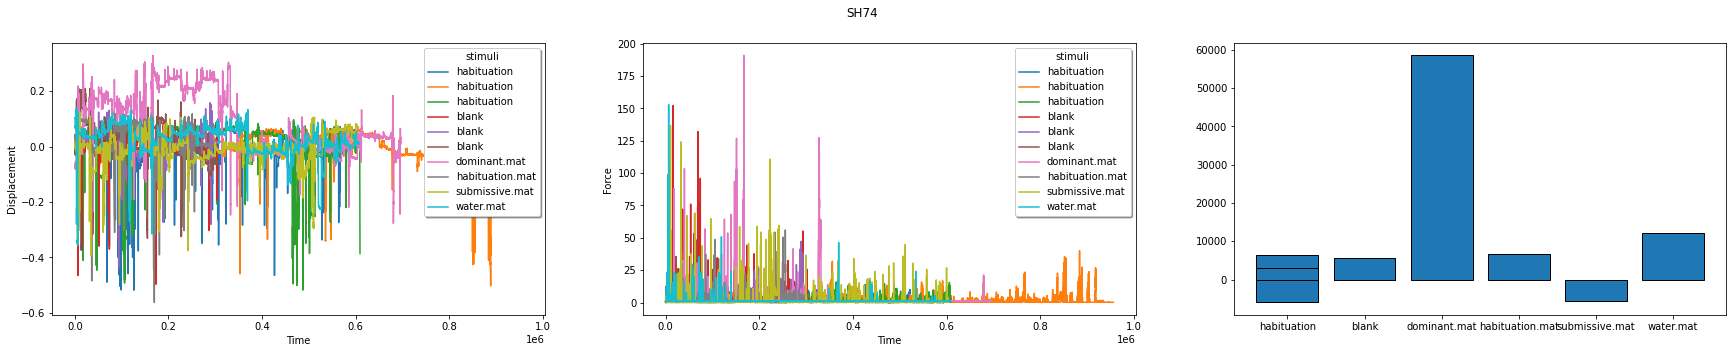

In [22]:
#@title ## Plot Displacement / Force { run: "auto" }
def filter_df(df):
  df_filtered = df[df['mouse'] == mouse]
  return df_filtered

def plot_by_mouse(df):
  mice_names = df['mouse'].unique()
  mouse = 'SH74' #@param ['ACC22', 'ACC23', 'HP1', 'HP2', 'PO377', 'PO388', 'PO389', 'PO391', 'SH58', 'SH59', 'SH61', 'SH62', 'SH63', 'SH66', 'SH67', 'SH73', 'SH74']

  f, (ax1,ax2, ax3) = plt.subplots(1,3, sharex=False, sharey=False, figsize=(30,5))
  df_mouse = df[df['mouse'] == mouse]
  stimuli = df_mouse['stimuli'].tolist()
  displacement = df_mouse['displacement'].tolist()
  force = df_mouse['force'].tolist()
  mouse_displacement = []
  for s_index, stimulus in enumerate(stimuli):
    time = len(force[s_index])
    timeseries = range(time)
    halfway_index = math.floor(time/2)
    
    # displacement
    displacement_norm_val = np.mean(displacement[s_index][halfway_index:]) # get second half of trial
    displacement_trace = np.array(displacement[s_index]/displacement_norm_val)-1
    displacement_plot = ax1.plot(timeseries, displacement_trace, label=stimulus)

    # force
    force_norm_val = np.mean(force[s_index][halfway_index:]) # get second half of trial
    force_trace = force[s_index]/force_norm_val
    force_plot = ax2.plot(timeseries, force_trace, label=stimulus)

    print(stimulus)
    print('  displacement: {}'.format(str(np.sum(displacement_trace))))
    mouse_displacement.append(np.sum(displacement_trace))
    print('  force: {}'.format(str(np.sum(force_trace))))
  ax1.legend(title='stimuli', loc='upper right', shadow=True)
  ax2.legend(title='stimuli', loc='upper right', shadow=True)

  ax3.bar(stimuli, mouse_displacement, ec='black')

  ax1.set_xlabel('Time')
  ax1.set_ylabel('Displacement')
  ax2.set_xlabel('Time')
  ax2.set_ylabel('Force')

  plt.suptitle(mouse)
  plt.show()


plot_by_mouse(sessions_df)

# def plot_by_mouse(df):
#   '''Plots displacement by mouse

#   Args:
#     df
#       DataFrame with specified displacement

#   Returns:
#     plot
#       plot of average displacement by mouse

#   '''
#   x_pos = list(range(len(error_names)))
#   fig, ax = plt.subplots(figsize=(10,7.5))
#   color_list = ['lightgrey'] * (len(error_names)-1) + ['steelblue']
#   plt.bar(x_pos, error_counts, color=color_list, ec='black')
#   plt.xlabel('Failure Type', FONTSIZE=25)
#   plt.ylabel('Frequency', FONTSIZE=25)
#   plt.title('Percentage of Trials by Failure Type', FONTSIZE=30)
#   plt.yticks(FONTSIZE=20)
#   plt.xticks(x_pos, error_names,  ROTATION=40, FONTSIZE=15, ha='right')
#   plt.ylim(0, max(error_counts)+0.05)
#   plt.grid(False, axis='x')
#   #plt.yticks(np.arange(min(0), max(0.2), 0.1))
#   plt.show()

# outcome_freq = [x/sum(outcome_counts) for x in outcome_counts]
# plot_errors(outcome_names[2:], outcome_freq[2:])